

# Deep Learning Fundamentals - Logistic Regression

# Task 1: Introduction

In [0]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Libraries imported')

Libraries imported


# Task 2: Hyperparameters

In [0]:
lr = 0.3
batch_size = 300  # 300 randomly selected examples from our dataset
iterations = 40

# Task 3: Dataset

In [0]:
# import helpers.dataset

(X_train, Y_train), (X_test, Y_test) = helpers.dataset.get_data()

Loading data..
11493376/11490434 [==============================] - 0s 0us/step
Done.


In [0]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of Y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of Y_test: (2115,)


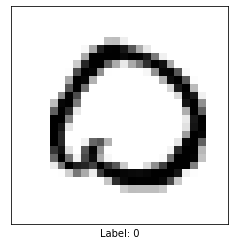

In [0]:
# import helpers.plt 

# this dunction will show examples of images along with labels
helpers.plt.show_example(X_train[100], Y_train[100])

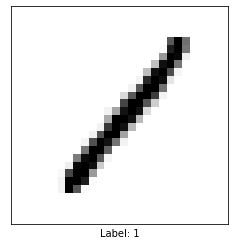

In [0]:
helpers.plt.show_example(X_train[-2], Y_train[-2])

# Task 4: A Mini Batch of Examples

X_train shape (2, 784)


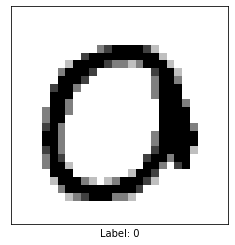

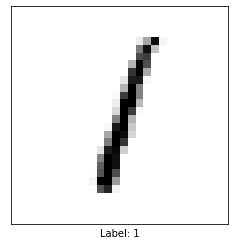

In [0]:
# import helpers.plt, helpers.dataset

# 1- no. of examples that you want to display
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 2)
print('X_train shape', X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])
helpers.plt.show_example(X_batch[1], Y_batch[1])

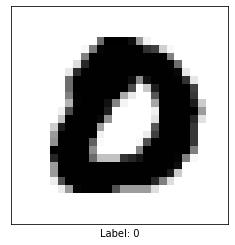

In [0]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_test, Y_test, 1)
helpers.plt.show_example(X_batch[0], Y_batch[0])

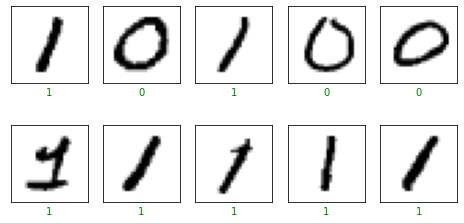

In [0]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 10)
helpers.plt.show_ten_examples(X_batch, Y_batch, Y_batch)

# Task 5: Create Model

In [0]:
class LogisticModel:
    def __init__(self, num_features):
        self.W = np.reshape(np.random.randn((num_features)), (num_features, 1))   
        self.b = np.zeros((1, 1))
        self.num_features = num_features
        self.losses = []
        self.accuracy = []
        
    def summary(self):
        print('=================================')
        print('Number of features:', self.num_features)
        # print('Value of weights:', self.W)
        print('Shape of weights:', self.W.shape)
        print('Shape of biases:', self.b.shape)
        print('=================================')
        
model = LogisticModel(num_features=784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


In [0]:

a=np.random.randn((5))
b=np.random.randn(7)
print(a)
print(b)

[ 0.08659067  0.79956544 -0.82942065  0.49605748  1.29906471]
[-0.39797963 -1.0996949   0.03320545  1.97128979 -2.18688947 -0.46067633
 -1.22885983]


# Task 5: Forward Pass

In [0]:
X_batch[0].size

784

In [0]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, Y=None):
        batch_size = X.shape[0]
        # linear output
        Z = np.dot(X, self.W) + self.b
        # activation output
        A = 1./(1.+np.exp(-Z))     # y prediction
        loss = float(1e6)   # meaningless if y is not None
        if Y is not None:
            loss = -1 * np.sum(np.dot(np.transpose(Y), np.log(A))+
                                      np.matmul(np.transpose(1-Y), np.log(1-A)))
            
            loss /= batch_size
        return A, loss

# Task 6: Backward Pass

In [0]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, Y):
        batch_size = X.shape[0]
        dZ = A-Y
        dW = np.dot(np.transpose(X), dZ) / batch_size
        db = np.sum(dZ) / batch_size
        return dW, db

# Task 7: Update Parameters

In [0]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        self.W -= lr*dW
        self.b -= lr*db

# Task 8: Check Model Performance

In [0]:
a=0.6
b=a>0.8
print(b)

False


In [0]:
import numpy as geek 
  
a = geek.array([[[2, 2, 2], [2, 2, 2]]]) 
print("Before squeeze:")
print ("array:", a)  
print("Shape:", a.shape)   
  
a_squeeze = geek.squeeze(a)  
print("\n\nAfter squeeze:")
print ("array : ", a_squeeze) 
print("Shape: ", a_squeeze.shape) 

Before squeeze:
array: [[[2 2 2]
  [2 2 2]]]
Shape: (1, 2, 3)


After squeeze:
array :  [[2 2 2]
 [2 2 2]]
Shape:  (2, 3)


In [0]:
class LogisticModel(LogisticModel):
    def predict(self, X, Y=None):
        A, loss = self._forward_pass(X, Y)
        Y_hat = A > 0.5
        return np.squeeze(Y_hat), loss
    
    def evaluate(self, X, Y):
        Y_hat, loss = self.predict(X, Y)
        accuracy = np.sum(Y_hat == np.squeeze(Y)) / X.shape[0]
        return accuracy, loss

In [0]:
model = LogisticModel(784)
model.summary()

X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
acc, loss = model.evaluate(X, Y)
print("Untrained model accuracy: {}, loss:{}".format(acc, loss))

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)
Untrained model accuracy: 0.52, loss:1.828607038902457


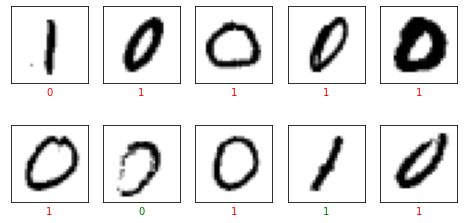

In [0]:
preds, _ = model.predict(X)
helpers.plt.show_ten_examples(X, Y, preds)

# Task 9: Training Loop

In [0]:
class LogisticModel(LogisticModel):
  # get_batch = get random batch function from helpers.dataset
    def train(self, batch_size, get_batch, lr, iterations, X_train, Y_train, X_test, Y_test):
        print("Training...")
        self.accuracies = []
        self.losses = []

        for i in range(iterations):
            X, Y = get_batch(X_train, Y_train, batch_size)
            A, loss = self._forward_pass(X, Y)
            dW, db = self._backward_pass(A, X, Y)
            self._update_params(dW, db, lr)

            X, Y = get_batch(X_test, Y_test, batch_size)
            val_acc, val_loss = self.evaluate(X, Y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)

            print("Iter: {}, Val Acc: {:.3f}, Val loss: {:.3f}".format(i, val_acc, val_loss))
        print("Training is finished")


# Task 10: Training the Model

In [0]:
model = LogisticModel(784)

X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
print("Before training performance:", model.evaluate(X, Y))

model.train(
    batch_size, 
    helpers.dataset.get_random_batch,
    lr,
    iterations,
    X_train, Y_train,
    X_test, Y_test
)

print("After training performance:", model.evaluate(X, Y))

Before training performance: (0.44, 3.1800141691353314)
Training...
Iter: 0, Val Acc: 0.527, Val loss: 1.652
Iter: 1, Val Acc: 0.690, Val loss: 0.974
Iter: 2, Val Acc: 0.817, Val loss: 0.505
Iter: 3, Val Acc: 0.833, Val loss: 0.436
Iter: 4, Val Acc: 0.897, Val loss: 0.315
Iter: 5, Val Acc: 0.927, Val loss: 0.212
Iter: 6, Val Acc: 0.940, Val loss: 0.249
Iter: 7, Val Acc: 0.943, Val loss: 0.157
Iter: 8, Val Acc: 0.953, Val loss: 0.096
Iter: 9, Val Acc: 0.940, Val loss: 0.247
Iter: 10, Val Acc: 0.963, Val loss: 0.118
Iter: 11, Val Acc: 0.953, Val loss: 0.176
Iter: 12, Val Acc: 0.940, Val loss: 0.163
Iter: 13, Val Acc: 0.983, Val loss: 0.068
Iter: 14, Val Acc: 0.947, Val loss: 0.151
Iter: 15, Val Acc: 0.933, Val loss: 0.161
Iter: 16, Val Acc: 0.970, Val loss: 0.092
Iter: 17, Val Acc: 0.987, Val loss: 0.049
Iter: 18, Val Acc: 0.973, Val loss: 0.085
Iter: 19, Val Acc: 0.973, Val loss: 0.094
Iter: 20, Val Acc: 0.983, Val loss: 0.059
Iter: 21, Val Acc: 0.973, Val loss: 0.075
Iter: 22, Val Acc:

# Task 11: Display the Results

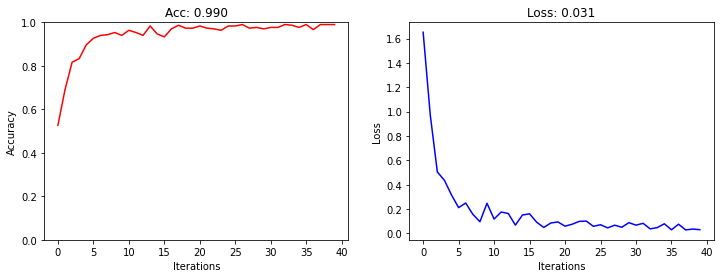

In [0]:
helpers.plt.plot_metrics(model)

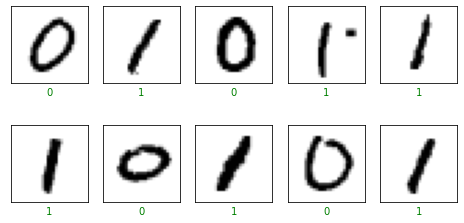

In [0]:
predictions, loss = model.predict(X, Y)
helpers.plt.show_ten_examples(X, Y, predictions)